# Importação das Bibliotecas
### As bibliotecas permitem uma ampla gama de recursos, afim de potencializar e facilitar o desenvolvimento do modelo. 

In [ ]:
!pip install emoji # instalação da biblioteca dos emojis
!pip install emoji_data_python # instalação da biblioteca específica para análise de emojis
!pip install pyspellchecker # instalação da biblioteca que corrige ortografia

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.9/240.9 kB 8.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for emoji: filename=emoji-2.2.0-py3-none-any.whl size=234911 sha256=c4d54bdd1d3b25042c11404b994c0bba76cea6110cdc8db48113c0afa94f42ed
  Stored in directory: /root/.cache/pip/wheels/02/3d/88/51a592b9ad17e7899126563698b4e3961983ebe85747228ba6
Successfully built emoji
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.8/105.8 kB 4.2 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 26.8 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import csv
import nltk
import spacy
import re,string, unicodedata
import emoji
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import emoji_data_python
from collections import Counter
from textblob import TextBlob
from textblob import Word
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from spellchecker import SpellChecker
from nltk.corpus import stopwords
from nltk import FreqDist
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud, STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.stem import LancasterStemmer, WordNetLemmatizer
from plotly.subplots import make_subplots
from bs4 import BeautifulSoup
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

# Carregar dataframe

### Nesta parte do código há implementação do método de carregamento do Dataframe utilizado. Sendo assim, criamos o caminho da pasta no Google Drive e sua leitura usando "pd.read_csv".

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

dados = pd.read_csv('/content/2-base_10052023.xlsx - Sheet1.csv')
dados.head()

dados = dados.rename(columns={'"autor"': 'autor', '"texto"': 'texto'})

dados

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


,Column1,id,autor,texto,shortCode,tipoInteracao,tipoMidia,idInteracao,idPai,URL,dataPublicada,dataInsercao,anomalia,probabilidadeAnomalia,processado,contemHyperlink
0,0,1,btgpactual,"Olá, Ana Paula! Como vai?\n\nSentimos muito pe...",CkG9KXjpY2B,reply,REELS,17949834317264462,17988010663613927,https://www.instagram.com/p/CkG9KXjpY2B/c/1798...,2022-10-25 15:35:24,2022-10-25 21:52:54,-1.0,0.0,0.0,-1.0
1,1,2,btgpactual,"Olá, Rosana! Tudo bem?\n\nPara te orientarmos ...",CkG9KXjpY2B,reply,REELS,17968362370910874,17955765434145877,https://www.instagram.com/p/CkG9KXjpY2B/c/1795...,2022-10-25 12:08:06,2022-10-25 21:52:54,-1.0,0.0,0.0,-1.0
2,2,3,btgpactual,@luizantoniojovinodossan 🚀 💙,CkG9KXjpY2B,reply,REELS,17968676113804345,17868806699792839,https://www.instagram.com/p/CkG9KXjpY2B/c/1786...,2022-10-25 08:16:15,2022-10-25 21:52:54,-1.0,0.0,0.0,-1.0
3,3,4,btgpactual,@ronialencar Boa tarde! Tudo bem?\n\nLamentamo...,CkG9KXjpY2B,reply,REELS,18045922528372377,18327741553009776,https://www.instagram.com/p/CkG9KXjpY2B/c/1832...,2022-10-25 09:39:32,2022-10-25 21:52:55,-1.0,0.0,0.0,-1.0
4,4,5,btgpactual,"Oi, Nelson! Tudo bem?\n\nPossuímos soluções co...",CkG9KXjpY2B,reply,REELS,17864851241797946,18159475801266342,https://www.instagram.com/p/CkG9KXjpY2B/c/1815...,2022-10-25 09:38:38,2022-10-25 21:52:55,-1.0,0.0,0.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4544,4544,3028308,caioaugustofr,"Estão contratando muitos blogueiros, mas eu fi...",Cn4bcg7LM4t,comment,REELS,17965800242039792,-,https://www.instagram.com/p/Cn4bcg7LM4t/c/1796...,2023-01-26 18:41:35,2023-01-26 19:01:29,-1.0,0.0,0.0,-1.0
4545,4545,3028501,btgpactual,@xubs._ 💙,Cn4bcg7LM4t,reply,REELS,18340331500020596,18014457793513467,https://www.instagram.com/p/Cn4bcg7LM4t/c/1801...,2023-01-26 18:44:27,2023-01-26 19:02:16,-1.0,0.0,0.0,-1.0
4546,4546,3028580,btgpactual,Agradecemos o seu feedback! 💙,CnzSr6ltH74,reply,REELS,18004216693521888,17957000375356996,https://www.instagram.com/p/CnzSr6ltH74/c/1795...,2023-01-26 18:45:13,2023-01-26 19:02:35,-1.0,0.0,0.0,-1.0
4547,4547,3029097,je_mascarenhas,Arrasa Micaaa 💙✨🙏🏼👏🏼👏🏼👏🏼👏🏼,Cn4bcg7LM4t,comment,REELS,17969884580114389,-,https://www.instagram.com/p/Cn4bcg7LM4t/c/1796...,2023-01-26 19:26:41,2023-01-26 19:31:45,-1.0,0.0,0.0,-1.0


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Etapa 1 - Análise dos Dados
### A análise exploratória dos dados é de fundamental importância, pois entende-se as principais características, padrões e tendências, além de identificar possíveis problemas e insights relevantes no dataset. 

## Análise quantitativa

#### A análise quantitativa envolve a aplicação de técnicas estatísticas para extrair informações numéricas significativas de uma base de dados de textos classificados. Essas informações podem ajudar a entender as tendências gerais dos dados e identificar padrões interessantes que possam ser explorados mais profundamente.

In [ ]:
dados.head()

,Column1,id,autor,texto,shortCode,tipoInteracao,tipoMidia,idInteracao,idPai,URL,dataPublicada,dataInsercao,anomalia,probabilidadeAnomalia,processado,contemHyperlink
0,0,1,btgpactual,"Olá, Ana Paula! Como vai?\n\nSentimos muito pe...",CkG9KXjpY2B,reply,REELS,17949834317264462,17988010663613927,https://www.instagram.com/p/CkG9KXjpY2B/c/1798...,2022-10-25 15:35:24,2022-10-25 21:52:54,-1.0,0.0,0.0,-1.0
1,1,2,btgpactual,"Olá, Rosana! Tudo bem?\n\nPara te orientarmos ...",CkG9KXjpY2B,reply,REELS,17968362370910874,17955765434145877,https://www.instagram.com/p/CkG9KXjpY2B/c/1795...,2022-10-25 12:08:06,2022-10-25 21:52:54,-1.0,0.0,0.0,-1.0
2,2,3,btgpactual,@luizantoniojovinodossan 🚀 💙,CkG9KXjpY2B,reply,REELS,17968676113804345,17868806699792839,https://www.instagram.com/p/CkG9KXjpY2B/c/1786...,2022-10-25 08:16:15,2022-10-25 21:52:54,-1.0,0.0,0.0,-1.0
3,3,4,btgpactual,@ronialencar Boa tarde! Tudo bem?\n\nLamentamo...,CkG9KXjpY2B,reply,REELS,18045922528372377,18327741553009776,https://www.instagram.com/p/CkG9KXjpY2B/c/1832...,2022-10-25 09:39:32,2022-10-25 21:52:55,-1.0,0.0,0.0,-1.0
4,4,5,btgpactual,"Oi, Nelson! Tudo bem?\n\nPossuímos soluções co...",CkG9KXjpY2B,reply,REELS,17864851241797946,18159475801266342,https://www.instagram.com/p/CkG9KXjpY2B/c/1815...,2022-10-25 09:38:38,2022-10-25 21:52:55,-1.0,0.0,0.0,-1.0


In [ ]:
# Identifica o tipo de dado que está contido no objeto
dados.dtypes

Column1                    int64
id                        object
autor                     object
texto                     object
shortCode                 object
tipoInteracao             object
tipoMidia                 object
idInteracao               object
idPai                     object
URL                       object
dataPublicada             object
dataInsercao              object
anomalia                 float64
probabilidadeAnomalia    float64
processado               float64
contemHyperlink          float64
dtype: object

In [ ]:
# Imprime informações sobre o dataset
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4549 entries, 0 to 4548
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Column1                4549 non-null   int64  
 1   id                     4549 non-null   object 
 2   autor                  4449 non-null   object 
 3   texto                  4449 non-null   object 
 4   shortCode              4421 non-null   object 
 5   tipoInteracao          4421 non-null   object 
 6   tipoMidia              4421 non-null   object 
 7   idInteracao            4421 non-null   object 
 8   idPai                  4421 non-null   object 
 9   URL                    4421 non-null   object 
 10  dataPublicada          4421 non-null   object 
 11  dataInsercao           4421 non-null   object 
 12  anomalia               4421 non-null   float64
 13  probabilidadeAnomalia  4421 non-null   float64
 14  processado             4393 non-null   float64
 15  cont

In [ ]:
# Imprime os dados estatíscos do dataset
dados.describe()

,Column1,anomalia,probabilidadeAnomalia,processado,contemHyperlink
count,4549.000000,4421.000000,4421.000000,4393.0,4393.0
mean,2274.000000,-0.993667,-0.006333,0.0,-1.0
std,1313.327517,0.079339,0.079339,0.0,0.0
min,0.000000,-1.000000,-1.000000,0.0,-1.0
25%,1137.000000,-1.000000,0.000000,0.0,-1.0
50%,2274.000000,-1.000000,0.000000,0.0,-1.0
75%,3411.000000,-1.000000,0.000000,0.0,-1.0
max,4548.000000,0.000000,0.000000,0.0,-1.0


In [ ]:
# Somatória dos dados nulos
dados.isnull().sum()

Column1                    0
id                         0
autor                    100
texto                    100
shortCode                128
tipoInteracao            128
tipoMidia                128
idInteracao              128
idPai                    128
URL                      128
dataPublicada            128
dataInsercao             128
anomalia                 128
probabilidadeAnomalia    128
processado               156
contemHyperlink          156
dtype: int64

In [ ]:
# Número de elementos que a dimensão (linhas e colunas) possui
dados.shape

(4549, 16)

In [ ]:
dados.query("texto== 'U+1F680'") # Emoji foguete por exemplo = U+1F680

,Column1,id,autor,texto,shortCode,tipoInteracao,tipoMidia,idInteracao,idPai,URL,dataPublicada,dataInsercao,anomalia,probabilidadeAnomalia,processado,contemHyperlink


In [ ]:
dados['autor'].value_counts()[:10]

btgpactual                 896
luizantoniojovinodossan     76
velhopraisso                34
mnapontes                   31
futuro_bom                  27
luiz_a.j.dos_santos         27
indkmoficial                25
alegalindo_miniindice       21
salomao2346                 20
mocafilho                   19
Name: autor, dtype: int64

In [ ]:
# Encontrar correlação entre as colunas do dataset
dados.corr()

<ipython-input-15-cf61c83606f5>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dados.corr()


,Column1,anomalia,probabilidadeAnomalia,processado,contemHyperlink
Column1,1.000000,0.028051,-0.028051,NaN,NaN
anomalia,0.028051,1.000000,-1.000000,NaN,NaN
probabilidadeAnomalia,-0.028051,-1.000000,1.000000,NaN,NaN
processado,NaN,NaN,NaN,NaN,NaN
contemHyperlink,NaN,NaN,NaN,NaN,NaN


In [ ]:
dados.columns

Index(['Column1', 'id', 'autor', 'texto', 'shortCode', 'tipoInteracao',
       'tipoMidia', 'idInteracao', 'idPai', 'URL', 'dataPublicada',
       'dataInsercao', 'anomalia', 'probabilidadeAnomalia', 'processado',
       'contemHyperlink'],
      dtype='object')

## Análise descritiva
#### Afim de correlacionar e afunilar a análise, desenvolve-se hipóteses. 
#### A partir das mesmas, buscamos o entendimento maior da base de dados e obter insights a respeito do pré-processamento.

### Comentários por tipo de post (Reels, Foto, Vídeo, Carrossel)
### Dado que cada tipo de mídia possui um objetivo diferente, entende-se que, conforme as suas diferenciações, as palavras mais comentadas podem ser diferentes e podem agregar para o usuário.

In [ ]:
df_midia = dados[['texto', 'tipoMidia', 'autor']].dropna().astype(str)
df_midia = df_midia.drop(df_midia[df_midia['autor'] == 'btgpactual'].index)
df_midia['tipoMidia'].value_counts()

REELS                1525
FEED                 1376
IMAGE                 215
VIDEO                 201
CAROUSEL_ALBUM        184
-                      24
18015162967458592       1
18008430814504778       1
17869519748783145       1
18171016729261171       1
Name: tipoMidia, dtype: int64

In [ ]:
# Seleção das colunas relevantes para a análise
df_repete = dados[['autor', 'texto']].astype(str)
#Tirando nulos, existia apenas 100
df_repete = df_repete.dropna()
df_repete.isna().sum()
#Juntando todos os textos um uma única array 

autor    0
texto    0
dtype: int64

In [ ]:
len(df_repete)

4549

In [ ]:
# Contagem dos comentários feitos pelo BTG
df_repete.query("autor == 'btgpactual'").value_counts()

autor       texto                                                                                                       
btgpactual  💙😉🚀                                                                                                             37
            @luizantoniojovinodossan 🚀 💙                                                                                     8
            Olá! Te enviamos uma DM.                                                                                         7
            @luizantoniojovinodossan 🚀 🚀                                                                                     6
            @alegalindo_miniindice 🚀                                                                                         4
                                                                                                                            ..
            @jadyverissimo 💙 💙                                                                                       

In [ ]:
# Retirada dos comentários do BTG
df_repete = df_repete.drop(df_repete[df_repete['autor'] == 'btgpactual'].index)
df_repete

,autor,texto
10,matheusriosortodontia,@gustavopaulinno Realmente. Ja rodei por aí e ...
13,erikacoimbra,👏👏👏
14,anapaulanakade,"O app está travando desde ontem, está em manut..."
15,rosanakassar,"Abri uma conta, mas achei muito complicado inv..."
16,luizantoniojovinodossan,👏
...,...,...
4542,gui.decicco,Participe da conferência econômica mais import...
4543,giballiana,A melhor que temos 🥰🥰
4544,caioaugustofr,"Estão contratando muitos blogueiros, mas eu fi..."
4547,je_mascarenhas,Arrasa Micaaa 💙✨🙏🏼👏🏼👏🏼👏🏼👏🏼


In [ ]:
array_comentarios = df_repete['texto'].values.flatten().astype(str)

### Palavras que mais aparecem nos comentários (sem *stemming*)
#### Com a finalidade de entender quais palavras mais se repetem em todos os comentários no perfil do BTG Pactual, desenvolve-se a análise descritiva tendo a *wordcloud*, além dos gráficos de barra e dispersão, como representações visuais.



In [ ]:

def preprocess(sentence):
    # Transforma todas as letras em minúsculas
    sentence = sentence.lower()

    # Remove números, pontuação e caracteres especiais
    sentence = sentence.translate(str.maketrans('', '', string.punctuation))
    sentence = sentence.strip()

    # Realiza as substituições de palavras
    sentence = re.sub(r'[.,"\'-?:!;]', '', sentence)
    sentence = re.sub(r'btg pactual', 'btg', sentence)
    sentence = re.sub(r'btg pactual', 'btgpactual', sentence)
    # sentence = re.sub(r'pactualbtg', 'btg pactual', sentence)
    # sentence = re.sub(r'btg pactualpactual', 'btg pactual', sentence)
    # sentence = re.sub(r'btgpactual', 'btg pactual', sentence)
    sentence = re.sub(r' btg pactual', 'btg ', sentence)
    # sentence = re.sub(r'btgpactualpactual', 'btg pactual', sentence)
    sentence = re.sub(r'btg pactual', 'pactual', sentence)
    # sentence = re.sub(r'pactualpactual', 'btg pactual', sentence)


    # Tokeniza a frase em palavras
    words = sentence.split()

    # Remove as stopwords
    stop_words = set(nltk.corpus.stopwords.words('portuguese'))
    stop_words_add = ['ola', 'olá', 'pra', 'para', 'bemvindo', 'benvindo', 'bem-vindo', 'bemvindos', 'aqui', 'vai', 'btgpactual']
    stop_words.update(stop_words_add)
    words = [word for word in words if word not in stop_words]

    # Remove palavras que são nulas
    words = filter(None, words)

    # Junta as palavras novamente em uma única string
    sentence = ' '.join(words)

    return sentence


In [ ]:
#Aplicando a função de preprocessamento sem stemming nas frases
frases_pre = []
for frase in array_comentarios:
    pre_ing = preprocess(frase)
    frases_pre.append(pre_ing)
    
frases_pre

['gustavopaulinno realmente ja rodei aí observei q quesito investimentos número',
 '👏👏👏',
 'app travando desde ontem manutenção',
 'abri conta achei complicado investir renda variável app confuso sai',
 '👏',
 'prezados app btg banking ar dia todo dificuldando vida oq acontecendo',
 'impressionada trabalho maravilhoso bem feito arrisquei dar chance recebi pagamento obrigado jessicaallenfxtrades',
 'alguém recomenda ter cartão',
 'valor taxa corretagem pois ainda sei',
 'aplicar manual escolhe ações',
 'exigente banco superou nunca pedi nada liberaram cartão limite ótimo tudo perfeito',
 'tá faltando zerar corretagens ações aí fica top',
 '💙',
 'outro igual btg melhor',
 'melhor equipe research 💪',
 'banco ecelente porém difícil conseguir limites tudo faço pedem foto rosto vezes rua movimento fica chato sempre chega notificação transferência pix compra dá ler mensagem completo pós fica faltando',
 'chegou hora ter cartão créditotá aprovando demaisdigio liberou mil limite ótimo cartão cré

In [ ]:
#Juntando todos os textos em uma string
texto = ''.join(frases_pre)
palavras = texto.split()

In [ ]:
# calcula a frequência de cada palavra
freq_dist = FreqDist(palavras)

# exibe as 3 palavras mais frequentes
print(freq_dist.most_common(100))

[('banco', 426), ('btg', 381), ('limite', 332), ('conta', 260), ('cartão', 228), ('investimentos', 176), ('todos', 169), ('dinheiro', 162), ('dia', 150), ('dias', 143), ('sobre', 138), ('agora', 137), ('sempre', 130), ('melhor', 124), ('investimento', 122), ('obrigado', 116), ('tudo', 112), ('crédito', 104), ('fazer', 103), ('cliente', 102), ('nunca', 99), ('clientes', 99), ('ano', 99), ('r', 98), ('nada', 95), ('vida', 93), ('todo', 92), ('ter', 92), ('vcs', 92), ('pode', 92), ('brasil', 87), ('investir', 85), ('bom', 85), ('pessoas', 81), ('mercado', 78), ('ainda', 76), ('mim', 76), ('hoje', 75), ('mil', 74), ('porque', 73), ('valor', 69), ('atendimento', 67), ('trabalho', 66), ('recebi', 63), ('fatura', 63), ('vou', 63), ('empresa', 62), ('anos', 62), ('link', 61), ('bem', 60), ('além', 60), ('apenas', 60), ('desse', 60), ('semana', 60), ('reais', 59), ('maior', 59), ('retorno', 59), ('assim', 59), ('sucesso', 59), ('contato', 58), ('parte', 56), ('vez', 56), ('h', 56), ('grande', 5

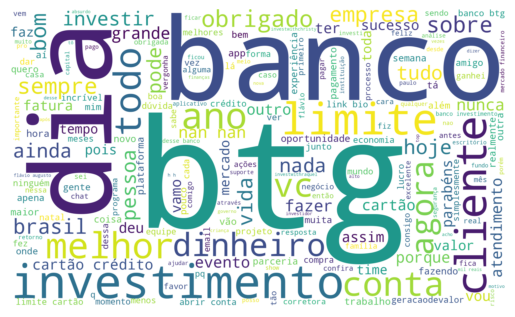

In [ ]:
# WordCloud
# Criando um objeto WordCloud com as configurações desejadas
wordcloud = WordCloud(width=2000, height=1200, background_color='white').generate(' '.join(frases_pre))

# Mostrando a imagem da nuvem de palavras
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
# Vizualização gráfica da frequência e dispersão das palavras
n = 10
top_n = freq_dist.most_common(n)
frequencias = [freq for palavra, freq in top_n]
palavras = [palavra for palavra, freq in top_n]
fig = make_subplots(rows=2, cols=1, subplot_titles=('Frequência de Palavras', 'Dispersão de Palavras'))

fig.add_trace(go.Bar(x=palavras, y=frequencias,
                     marker={'color': 'rgb(6,57,112)'}),
              row=1, col=1)

fig.add_trace(go.Scatter(x=list(freq_dist.keys()), y=list(freq_dist.values()), mode='markers'),
              row=2, col=1)

fig.update_layout(showlegend=False, height=1000, title_text='Frequência de Palavras', plot_bgcolor='white')
fig.show()

### Conjunto de três palavras com maior frequência
#### A fim de ter maior arcabouço de palavras frequentes nos comentários, opta-se pela seleção dos conjuntos de três palavras.

In [ ]:
from nltk import ngrams

trigrams = []

for frase in frases_pre:
    words = frase.split()
    trigrams += list(ngrams(words, 3))
# Contar a frequência dos trigramas
freq_tri = nltk.FreqDist(trigrams)

# Ordenar as frequências em ordem decrescentetop
top = freq_tri.most_common(100)
top


[(('feira', 'arte', 'contemporânea'), 18),
 (('arte', 'contemporânea', 'pernambuco'), 16),
 (('artpe', 'feira', 'arte'), 14),
 (('limite', 'cartão', 'crédito'), 12),
 (('sociedade', 'hípica', 'brasileira'), 12),
 (('liberou', 'mil', 'limite'), 11),
 (('mil', 'limite', 'ótimo'), 11),
 (('limite', 'ótimo', 'cartão'), 11),
 (('ótimo', 'cartão', 'crédito'), 11),
 (('cartão', 'crédito', 'aprovando'), 11),
 (('crédito', 'aprovando', 'demais'), 11),
 (('aprovando', 'demais', 'quer'), 11),
 (('demais', 'quer', 'link'), 11),
 (('quer', 'link', 'indicação'), 11),
 (('link', 'indicação', 'p'), 11),
 (('indicação', 'p', 'aprovação'), 11),
 (('p', 'aprovação', 'facilitada'), 11),
 (('aprovação', 'facilitada', 'comente'), 11),
 (('facilitada', 'comente', 'algo'), 11),
 (('comente', 'algo', 'mande'), 11),
 (('algo', 'mande', 'msg'), 11),
 (('mande', 'msg', 'direct'), 11),
 (('msg', 'direct', 'boa'), 11),
 (('direct', 'boa', 'sorte'), 11),
 (('boa', 'sorte', 'obrigada'), 11),
 (('banco', 'investimento

In [ ]:
n = 20
top_n = freq_tri.most_common(n)
frequencias = [freq for trigram, freq in top_n]
trigramas = [' '.join(trigram) for trigram, freq in top_n]

fig = go.Figure(go.Bar(x=trigramas, y=frequencias, marker={'color': 'rgb(6,57,112)'}))

fig.update_layout(title='Frequência de Trigramas', xaxis_title='Trigramas', yaxis_title='Frequência')
fig.show()

### Relação determinística entre as colunas Anomalia e Comentário
#### Durante o recebimento da base de dados, haviam-se dúvidas a respeito do significado dos dados contidos na coluna Anomalia. Portanto, estrutura-se a hipótese que busca identificar relações entre os comentários (foco da análise no geral) e a coluna Anomalia.

In [ ]:
#Configurações para retirar o limite de colunas e linhas 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [ ]:
# Seleção das colunas relevantes para a análise
df_anomalia = dados[['texto', 'anomalia']].astype(str)
#Tirando nulos, existia apenas 100
df_anomalia = df_anomalia.dropna(axis=1)

In [ ]:
df_anomalia

,texto,anomalia
0,"Olá, Ana Paula! Como vai?\n\nSentimos muito pe...",-1.0
1,"Olá, Rosana! Tudo bem?\n\nPara te orientarmos ...",-1.0
2,@luizantoniojovinodossan 🚀 💙,-1.0
3,@ronialencar Boa tarde! Tudo bem?\n\nLamentamo...,-1.0
4,"Oi, Nelson! Tudo bem?\n\nPossuímos soluções co...",-1.0
5,"@bastosroberio Olá,tudo bem?\n\nHoje cobramos ...",-1.0
6,@drmilior Olá! Tudo bem? \n\nTem sim! Você pod...,-1.0
7,"@galdino.runner, agradecemos o seu feedback! C...",-1.0
8,"Olá, Roni! Tudo bem?\n\nHoje cobramos uma corr...",-1.0
9,@thlimaoficial 💙 🚀,-1.0


In [ ]:
#Método para conferir os resultados sem repetição da coluna anomalia (.unique()) 
valores_unicos_anomalia = dados['anomalia'].unique()
print(valores_unicos_anomalia)

[-1. nan  0.]


In [ ]:
#Agrupamento aleatório de linhas para cada tipo de resultado na coluna anomalia
amostra = dados.groupby('anomalia').apply(lambda x: x.sample(20))
print(amostra)

               Column1                                                 id  \
anomalia                                                                    
-1.0     559       559                                                560   
         2758     2758                                            1128803   
         2875     2875                                            1261458   
         3438     3438                                            2109460   
         188       188                                                189   
         3835     3835                                            2924731   
         2744     2744                                            1125369   
         2504     2504                                             869706   
         4206     4206                                            2963020   
         3446     3446                                            2112745   
         2170     2170                                             632293   

### Uso de Emoji na Base de dados

#### O objetivo desta hipótese é entender quais são emojis que mais aparecem no dataset e qual seria o melhor tratamento paraos mesmos, com o intuito de que a análise de sentimento seja mais precisa, com base nas aparições no dataset.




In [ ]:
comentarios = dados.dropna() # Drop comments nulos 
texto = "".join(comentarios["texto"]).lower()

In [ ]:
count = emoji.emoji_count(texto) # Contar a quantidade de emojis 

print(f"possui {count} emojis.")

possui 6025 emojis.


In [ ]:
emoji_dict = dict(Counter(c for c in texto if emoji.is_emoji(c))) # Contagem de emojis do dicionario

most_common_emojis = Counter(emoji_dict).most_common(15) # Top 15 emojis mais utilizados nos comentários

total_emojis = sum(emoji_dict.values()) # Cálculo da porcentagem de aparição de cada emoji
emoji_percentages = {k: v / total_emojis for k, v in most_common_emojis}

df = pd.DataFrame({'emoji': list(emoji_percentages.keys()), 'percentage': list(emoji_percentages.values())}) # Dataframe dos resultados

df = df.sort_values(by='percentage', ascending=False)# Ordena os resultados por porcentagem decrescente

print(df)

   emoji  percentage
0      👏    0.289761
1      💙    0.114259
2      🚀    0.100174
3      😉    0.059187
4      🔥    0.034024
5      😍    0.032284
6      🏻    0.027219
7      ❤    0.021522
8      🙌    0.020889
9      😂    0.018199
10     🏼    0.014243
11     😢    0.008862
12     🙏    0.008546
13     🎄    0.008546
14     ✔    0.008229


# Etapa 2 - Pré processamento

## As etapas de pré-processamento em um projeto de análise de sentimento têm como objetivo preparar os dados textuais para que possam ser analisados por um modelo de aprendizado de máquina.

## Pipeline 
### Utiliza-se o pipeline com a finalidade de evidenciar as etapas utilizadas nesse processo, demonstando que os outputs de um procedimento torna-se input da sequente.
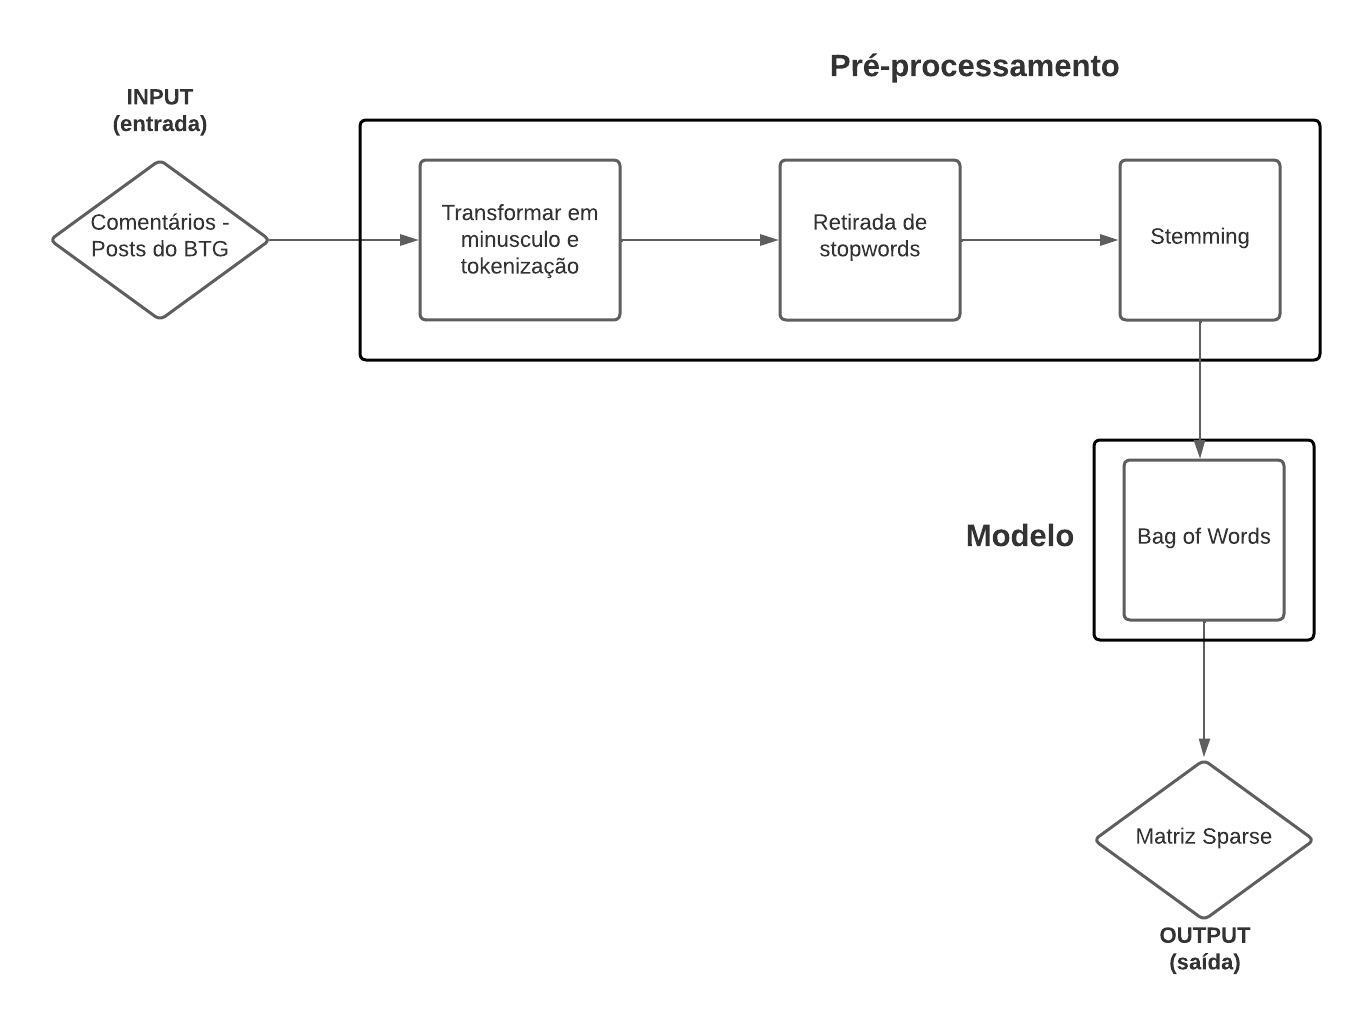

##Testando etapas de Pré Processamento

###Estruturação

#### Inicialmente, retira-se informações nulas, legendas e comentários do próprio BTG Pactual do dataset.

In [ ]:
#Retirando valores nulos
df_textoAutor = dados[['autor', 'texto']].dropna()
#Retirando posts do btg
df_textoAutor = dados.drop(dados[dados['autor'] == 'btgpactual'].index)
df_textoAutor.shape

(3653, 16)

In [ ]:
#Retirando uma frase teste do banco e deixando toda em minúsculo
sentence_teste = dados['texto'].iloc[100].lower()
sentence_teste

'@mahry.silvaa olá! como vai? \n\nfizemos esta mudança para garantir uma melhor experiência aos nossos clientes. agradecemos o feedback, vamos de encaminhar para o time responsável para que seja analisado.\n\nem caso de dúvidas, estamos à disposição!'

###Tokenização

#### Em seguida, realiza-se a tokenização a fim de dividir o texto em unidades menores, como palavras ou frases, para que possa ser analisado com maior facilidade.

In [ ]:
#tokenizando o texto
tokens = sentence_teste.lower().split()

In [ ]:
#teste
tokens

['@mahry.silvaa',
 'olá!',
 'como',
 'vai?',
 'fizemos',
 'esta',
 'mudança',
 'para',
 'garantir',
 'uma',
 'melhor',
 'experiência',
 'aos',
 'nossos',
 'clientes.',
 'agradecemos',
 'o',
 'feedback,',
 'vamos',
 'de',
 'encaminhar',
 'para',
 'o',
 'time',
 'responsável',
 'para',
 'que',
 'seja',
 'analisado.',
 'em',
 'caso',
 'de',
 'dúvidas,',
 'estamos',
 'à',
 'disposição!']

### Stop-Words

#### Já a eliminação de stop-words, retira do dataset palavras que não agregam valor semântico para a análise.

In [ ]:
# Removendo números, pontuação e caracteres especiais
sentence_teste = sentence_teste.translate(str.maketrans('', '', string.punctuation))
sentence_teste = sentence_teste.strip()

In [ ]:
#Teste 
sentence_teste

'mahrysilvaa olá como vai \n\nfizemos esta mudança para garantir uma melhor experiência aos nossos clientes agradecemos o feedback vamos de encaminhar para o time responsável para que seja analisado\n\nem caso de dúvidas estamos à disposição'

In [ ]:
#Removendo stop-words e adicionando novas stop words ao corpus nltk
stop_words = set(nltk.corpus.stopwords.words('portuguese'))
stop_words_add = ['ola', 'olá', 'pra', 'para', 'bemvindo','benvindo', 'bem-vindo', 'bemvindos', 'aqui', 'vai', 'btgpactual']
stop_words.update(stop_words_add)
new_words = []
for word in sentence_teste:
    if word not in stop_words:
        new_words.append(word)
        sentence_teste = ''.join(new_words)
        

In [ ]:
#Teste
sentence_teste

'mhrysilv lá cm vi \n\nfizms st mudnç pr grntir um mlhr xpriênci s nsss clints grdcms  fdbck vms d ncminhr pr  tim rspnsávl pr qu sj nlisd\n\nm cs d dúvids stms  dispsiçã'

### Testando corretor de palavras

#### Evidencia-se o teste de bibliotecas que corrigem palavras escritas de forma errônea, característica recorrente nas redes sociais, e melhorar a assertividade do modelo.

In [ ]:
!pip install pyspellchecker

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#Corrigindo erros 
from spellchecker import SpellChecker
frase_errada = 'As veses estol gostandu di vose'
words = frase_errada.split()
spell = SpellChecker(language='pt')

In [ ]:
#Teste
for word in words:
    print(spell.correction(word))

#Era esperado retornar de e você. Porém houve algumas correções interessantes.

As
vezes
estou
gostando
di
vos


In [ ]:
#Teste com a sentença teste para ver se modifica algum resultado
for word in sentence_teste.split():
    print(spell.correction(word))

#Retornou palavras com # no começo, ou palavras fora do dicionário como btgpactual ele retornou none. Nos emoji retornou uma letra. De restante as palavras foram corretas.
#Portanto seria interessante fazer o tratamento dos emojis antes e realizar uma condição de que seja none, não realize a correção da palavra

None
lá
cm
vi
fiz
st
mundo
pr
sentir
um
melhor
None
s
isso
cliente
gracas
deck
vos
d
None
pr
tim
None
pr
qu
se
lisa
m
os
d
dúvida
sms
disposição


###Testando corretor de abreviações e deletar emojis
#### Assim como as palavras escritas de maneira errônea, o uso de abreviações e emojis fazem parte da comunicação utilizadas nas redes sociais. Portanto, testa-se as bibliotecas que trazem a palavra completa no lugar das abreviações e deleta os emojis da frase.

In [ ]:
!pip install enelvo

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.5/27.5 MB 52.0 MB/s eta 0:00:00


In [ ]:
from enelvo.normaliser import Normaliser
#Criando mensagem para correções
msg = 'hj vou usar meu cartão do banco btg, pq gosto mt dele👊'
# instanciando
norm = Normaliser(tokenizer='readable')

In [ ]:
#teste
resposta = norm.normalise(msg)
print(resposta) 
#Corrigiu corretamente as abreviações, porém houve uma erro de concordância, 'muita dele'

hoje vou usar meu cartão do banco pactual , porque gosto muita dele 👊


In [ ]:
#teste na sentença teste
for word in sentence_teste.split():
    print(norm.normalise(word))

#mudou a palavra btgpactual, para pactual, tentou normalizar algumas palavras porém deu erro

ERROR:enelvo.normaliser:Failed to normalise word "mhrysilv"!


mhrysilv
lá
com
vi
fizemos
st
mudança
para
garantir
um
melhor
experiência
sim
nessas
clines
graças
odbc
vamos
de
nominho
para
tim
rspnsávl
para
que
se
alis
me
casa
de
duvidas
sets
disposição


In [ ]:
#Removendo emoji
sanitizer = Normaliser(sanitize=True)

In [ ]:
#teste 
sanitizer.normalise(msg)
#Retirou o emoji

'hoje vou usar meu cartão do banco pactual porque gosto muita dele'

###Testando o stemming

#### O processamento de stemmatização dos comentários corresponde à redução das palavras para a sua raiz, com o propósito de mapear as mesmas raízes com maior facilidade.

In [ ]:
#Instanciando
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer('portuguese')

In [ ]:
#teste
for word in sentence_teste.split():
    print(stemmer.stem(word))
#Realmente reduziu as palavras, mas algumas serião desnecessários, como fredpomp

mhrysilv
lá
cm
vi
fizms
st
mudnc
pr
grntir
um
mlhr
xpriênc
s
nsss
clints
grdcms
fdbck
vms
d
ncminhr
pr
tim
rspnsávl
pr
qu
sj
nlisd
m
cs
d
dúvids
stms
dispsiçã


###Stemming

In [ ]:

import string
import nltk
from nltk.stem.snowball import SnowballStemmer

def preprocess_stem(sentence):
    sentence = sentence.translate(str.maketrans('', '', string.punctuation))
    sentence = sentence.strip()

        # Transforma todas as letras em minúsculas
    sentence = sentence.lower()

    # Remove números, pontuação e caracteres especiais
    sentence = sentence.translate(str.maketrans('', '', string.punctuation))
    sentence = sentence.strip()

    # Tokeniza a frase em palavras
    words = sentence.split()

    # Criar um stemmer para o idioma português
    stemmer = SnowballStemmer('portuguese')

    # Remove as stopwords
    stop_words = set(nltk.corpus.stopwords.words('portuguese'))
    stop_words_add = ['ola', 'olá', 'pra', 'para', 'bemvindo','benvindo', 'bem-vindo', 'bemvindos', 'aqui', 'vai']
    stop_words.update(stop_words_add)
    stemmed_words = [stemmer.stem(word) for word in words if word not in stop_words]

    # Remove palavras que são nulas
    stemmed_words = filter(None, stemmed_words)


    # Junta as palavras novamente em uma única string
    sentence = ' '.join(stemmed_words)

    return sentence

In [ ]:
#Teste
frase = dados['texto'].iloc[200]
print(frase)
print()
print(preprocess_stem(frase))

@leandroreis_investiment 💙 🚀

leandroreisinvestiment 💙 🚀


### Função de pré-processamento

In [ ]:
def pipeline(dataset):
    # Transforma todas as letras em minúsculas
    dataset = dataset.lower()

    # Remove números, pontuação e caracteres especiais
    dataset = dataset.translate(str.maketrans('', '', string.punctuation))
    dataset = dataset.strip()

    # Tokeniza a frase em palavras
    words = dataset.split()

    # Criar um stemmer para o idioma português
    stemmer = SnowballStemmer('portuguese')

    # Remove as stopwords
    stop_words = set(nltk.corpus.stopwords.words('portuguese'))
    stop_words_add = ['ola', 'olá', 'pra', 'para', 'bemvindo','benvindo', 'bem-vindo', 'bemvindos', 'aqui', 'vai']
    stop_words.update(stop_words_add)
    stemmed_words = [stemmer.stem(word) for word in words if word not in stop_words]

    # Remove palavras que são nulas
    stemmed_words = filter(None, stemmed_words)


    # Junta as palavras novamente em uma única string
    dataset = ' '.join(stemmed_words)

    return dataset

In [ ]:
frases_pre = []
for frase in df_textoAutor['texto'].astype(str).dropna():
    pre_pt = pipeline(frase)
    frases_pre.append(pre_pt)

frases_pre

['gustavopaulinn realment ja rod aí observ q quesit invest btgpactual númer',
 '👏👏👏',
 'app trav desd ontem manutençã',
 'abri cont ache complic invest rend variável app confus sai',
 '👏',
 'prez app btg banking ar dia tod dificuld vid oq acontec',
 'impression trabalh maravilh bem feit arrisqu dar chanc 300 receb pagament 5150 obrig jessicaallenfxtrad',
 'alguém recomend ter cartã',
 'valor tax corretag pois aind sei',
 'aplic manual escolh açõ',
 'exigent banc super nunc ped nad liber cartã limit ótim tud perfeit',
 'tá falt zer corretagens açõ aí fic top',
 '💙',
 'outr igual btg melhor',
 'melhor equip research 💪',
 'banc ecelent porém difícil consegu limit tud fac ped fot rost vez rua moviment fic chat sempr cheg notific transferent pix compr dá ler mensag complet pós fic falt',
 'cheg hor ter cartã créditot aprov demaisdigi liber 5 mil limit ótim cartã crédit aprov dem quer link indic p aprov facilit coment algo mand msg direct boa sort obrig',
 'melhor❤️❤️ 👏🏻👏🏻ador faz part td is

In [ ]:

# Dados após o pré-processamento
dados_preprocessados = frases_pre

# Caminho para o arquivo CSV de saída
caminho_arquivo_csv = "resultado_preprocessamento.csv"

# Escrever os dados no arquivo CSV
with open(caminho_arquivo_csv, mode='w', newline='') as arquivo_csv:
    writer = csv.writer(arquivo_csv, delimiter=',')
    writer.writerow(["Pré-processamento"])  # Escreve o cabeçalho
    writer.writerows(dados_preprocessados)  # Escreve os dados

print("Arquivo CSV gerado com sucesso!")

Arquivo CSV gerado com sucesso!


# Etapa 3 - Modelo Bag of Words

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
vectorizer = CountVectorizer()
vectorizer.fit(frases_pre)
# vectorizer.fit(palavras)
print(sorted(vectorizer.vocabulary_))

['00', '000', '00000', '0050', '01', '02', '02122022', '0312', '04', '040', '05', '05012023', '062', '06964103', '075', '08', '0800', '0825', '082btc', '0900', '0911', '09dez2022', '0km', '0xandrey', '10', '100', '1000', '10000', '10029', '100k', '101', '10500', '10760', '1086', '10h', '11', '1100', '1100000000', '110m', '111122', '1112', '112', '1145', '11500', '117', '11800', '11h', '11pts', '12', '120', '1200', '12000', '120000', '120m', '1212', '123', '1236', '12500', '12560', '12600', '12750', '12h', '13', '130', '13000', '1300000', '13012023', '1307', '1324', '13500', '135m', '13644', '1375', '13h', '14', '14000', '140m', '141', '1412', '141501', '14200', '1425', '1441', '145', '14500usd', '145160m', '145700', '14684', '1475', '14h', '15', '150', '1500', '15000', '150m', '15122022de', '1550', '15500', '155m', '156', '15800', '1599', '15h', '15k', '16', '160', '1600', '1600000', '16400', '165', '166', '16h', '17', '1700', '17000', '17112022', '175', '175000', '17600', '17h', '18',

In [ ]:
vector = vectorizer.transform(frases_pre)
#vector = vectorizer.transform(palavras)
# Sumariza
print(vector.shape)
print(vector.toarray())

(3653, 7571)
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
df = pd.DataFrame(vector.toarray())
print(df.head())

   0     1     2     3     4     5     6     7     8     9     10    11    \
0     0     0     0     0     0     0     0     0     0     0     0     0   
1     0     0     0     0     0     0     0     0     0     0     0     0   
2     0     0     0     0     0     0     0     0     0     0     0     0   
3     0     0     0     0     0     0     0     0     0     0     0     0   
4     0     0     0     0     0     0     0     0     0     0     0     0   

   12    13    14    15    16    17    18    19    20    21    22    23    \
0     0     0     0     0     0     0     0     0     0     0     0     0   
1     0     0     0     0     0     0     0     0     0     0     0     0   
2     0     0     0     0     0     0     0     0     0     0     0     0   
3     0     0     0     0     0     0     0     0     0     0     0     0   
4     0     0     0     0     0     0     0     0     0     0     0     0   

   24    25    26    27    28    29    30    31    32    33    34    35   

# TFID


## O TfidVectorizer calcula o inverso das frequências e codifica os vetores a fim de calcular a relevância de cada termo nos documentos. Diferente do CountVectorizer, este algoritmo calcula 'word frequencies'. Isso impede que, por exemplo, artigos ou palavras não muito significantes acabem sendo reconhecidos como muito relevantes apenas pelo grande número de ocorrências na base de dados, uma vez que essa frequência inversa leva mais em conta o contexto das palavras empregadas em cada frase.

In [ ]:
vectorizer = TfidfVectorizer()
vectorizer.fit(frases_pre)
print(sorted(vectorizer.vocabulary_))
vector = vectorizer.transform([frases_pre[0]])

['00', '000', '00000', '0050', '01', '02', '02122022', '0312', '04', '040', '05', '05012023', '062', '06964103', '075', '08', '0800', '0825', '082btc', '0900', '0911', '09dez2022', '0km', '0xandrey', '10', '100', '1000', '10000', '10029', '100k', '101', '10500', '10760', '1086', '10h', '11', '1100', '1100000000', '110m', '111122', '1112', '112', '1145', '11500', '117', '11800', '11h', '11pts', '12', '120', '1200', '12000', '120000', '120m', '1212', '123', '1236', '12500', '12560', '12600', '12750', '12h', '13', '130', '13000', '1300000', '13012023', '1307', '1324', '13500', '135m', '13644', '1375', '13h', '14', '14000', '140m', '141', '1412', '141501', '14200', '1425', '1441', '145', '14500usd', '145160m', '145700', '14684', '1475', '14h', '15', '150', '1500', '15000', '150m', '15122022de', '1550', '15500', '155m', '156', '15800', '1599', '15h', '15k', '16', '160', '1600', '1600000', '16400', '165', '166', '16h', '17', '1700', '17000', '17112022', '175', '175000', '17600', '17h', '18',

In [ ]:
print(vectorizer.idf_)

[8.10496545 8.10496545 8.51043056 ... 8.51043056 8.51043056 8.51043056]
